#INTRO
This notebook is the first of three and it is dedicated to portfolio analysis methods for stock **selection**. It is a very basic form of portfolio selection. Part 2 will be focused on exploration and Part 3 will be focused on modeling. 
In general, this is a 2 step process. After the data has been collected, which involves screening stock returns for normality, we then calculate the Sortino Ratio, a measurement of volatility on returns. 
Crucial NOTE: individual tickers were treated as portfolios. Technically, a portfolio is a set of stocks or tickers. Weights are normally assigned to each stock to indicate the quantities invested in each stock so that the sum of the weights is 1. 
Moving directly to traditional portfolio optimization assumes we have a desirable set of stocks whose weights we wish to optimize. 
To prevent arbitrarily initializing weights, this detail was overlooked. It was overlooked despite Markovitz Efficient Frontier Optimization technique. Altogether the issue was deliberately overlooked because it is currently an open problem in portfolio analysis and requires a quite a lot of time for experimentation and validation. In addition, the goal of this project is not necessarily to maximize profit but more so to understand volatility as it relates to forecasting techniques especially while our forecasting is constrained to univariate time series.

In [0]:
from pandas_datareader import data as dr
import matplotlib.pyplot as plt
import pandas as pd

Tickers Collected from Excel Spreadsheet on Yahoo Finance: https://finance.yahoo.com/sector/ms_healthcare
These tickers were gathered through manual selection and csv generation. You must extract the tickers from the csv files. You can automate this process if you wish. 

In [0]:
original_health = [
'CRL','GH','MOH','HRC','PRGO','QGEN','CTLT','JAZZ','NVCR','TECH','BHC','TEVA','MASI','BGNE','ICLR','CGC','ABMD','IONS','NBIX'
,'HSIC','DVA','ALNY','PKI','GLPG','PODD','BIO','ELAN','MYL','WST','VAR','XRAY','SGEN','STE','BMRN','UHS','WCG','HOLX','GMAB'
,'CAH','DXCM','DGX','ALGN','WAT','COO','TFX','INCY','LH','MTD','ABC','GRFS','CNC','RMD','FMS','SNN','ALXN','IDXX','A','MCK'
,'ALC','ZBH','IQV','REGN','HUM','HCA','ILMN','BIIB','PHG','BAX','VRTX','EW','AGN','TAK','BSX','CI','ZTS','ISRG','ANTM','BDX'
,'CELG','SYK','BMY','GILD','CVS','DHR','GSK','DHR-PA','ABBV','LLY','TMO','SNY','AZN','AMGN','NVO','ABT','MDT','NVS','PFE','UNH'
,'MRK','JNJ','BKD','ENTA','IRWD','APHA','ATRI','EIDX','MGLN','NRC','INSP','APLS','PCRX','AKCA','TCDA','QURE','PDCO','USPH','INSM'
,'DNLI','CSII','PBH','MMSI','AVNS','DCPH','LVGO','MD','NVTA','PTLA','CBM','IRTC','AGIO','ICPT','PTCT','SEM','MYGN','HALO','BHVN'
,'THC','ARNA','NTRA','RARE','ITGR','ENSG','MYOK','GKOS','AMN','WMGI','TLRY','QDEL','GHDX','HCM','EBS','ARWR','NVRO','CNMD','ACHC'
,'BBIO','TARO','MEDP','ALKS','GBT','CMD','ICUI','FGEN','NKTR','NEOG','MRTX','NUVA','ALLO','UTHR','MOR','LHCG','LIVN','MDCO','BPMC'
,'ONCE','ALLK','RGEN','AMED','NVST','CBPO','ADPT','ARGX','PEN','GMED','ASND','HZNP','IART','ACAD','EXEL','SYNH','SRPT','BLUE','MRNA'
,'SDC','EHC','HAE','RDY','PRAH','BRKR','CHE','OMI','HARP','OBSV','CRNX','COLL','CTMX','SGRY','BLU','CBAY','UTMD','CYCN','BCEL','TCRR'
,'DPLO','CCXI','RCUS','DERM','XBIT','AMAG','VIVO','ITCI','CUTR','KNSA','PGNX','MIST','SYRS','OSUR','PBYI','REPL','MYOV','DTIL','SLDB'
,'TBIO','AVRO','LCI','THOR','AKRO','SNDL','VYGR','AUTL','IGMS','KPTI','SRDX','MGNX','MGTX','DBVT','MESO','GNFT','ANGO','RUBY','ANIK'
,'KURA','CRTX','PRNB','PRSC','PETQ','CYTK','HNGR','ATRA','ARVN','FIXX','STOK','CDXS','TVTY','TWST','INMD','AXNX','NXTC','ODT','XON'
,'SWAV','AMPH','SPPI','EPZM','LMNX','ZEAL','DRNA','OFIX','ATNX','ANAB','NGM','INGN','ADUS','INVA','CRY','ZYME','VREX','NTUS','YMAB'
,'SGMO','EDIT','GTHX','ALEC','TPTX','MNTA','RGNX','GOSS','ORTX','BEAT','AIMT','SWTX','CPIX','ARAV','SCPH','NVAX','AXGT','VAPO','CNST'
,'IDYA','BCYC','HOOK','KMDA','SPRO','EVLO','CHMA','SPNE','ARA','SNDX','NCNA','APYX','XERS','KLDO','UBX','CBMG','IVC','FTSV','UROV'
,'SRRK','PRTA','OPTN','GRTS','TORC','ATEC','SIEN','FLDM','ASMB'
    
]

getTicks() is a method written to bypass Unreadable Tickers and Collect Readable ones. 
get_data_yahoo() accepts a list of tickers as input and returns prices in a multi index data frame.

In [0]:
def getTicks(items):
  symbols = []
  unreadables = []
  for i in items: 
    try:
      data = dr.get_data_yahoo(i, start_date, end_date)
    except Exception as e:
      #print("{} is unreadable".format(i))
      unreadables.append(i)
    else:
      symbols.append(i)
  return symbols

*Input* Tickers to get readable ones

In [0]:
adj = getTicks(original_health)
#lst = adj[0]

Read Tickers to DataFrame taking only Adj Close Prices. 
For multi indexing, you want to take special care with the column slicer which requires a tuple as input. slice(None) means all tickers with an Adj Close price.
Create time period parameter objects: start and end date.

In [0]:
start_date = '2014-01-01'
end_date = '2019-01-05'

In [0]:
df = dr.get_data_yahoo(adj, start_date, end_date)
prices = df.loc[:,('Adj Close',slice(None))]

In [0]:
prices.head()

Attributes  Adj Close                 ...                           
Symbols           CRL  GH        MOH  ... SIEN       FLDM       ASMB
Date                                  ...                           
2014-01-02  52.880001 NaN  36.150002  ...  NaN  36.799999  18.799999
2014-01-03  53.459999 NaN  36.610001  ...  NaN  36.869999  18.150000
2014-01-06  52.980000 NaN  36.220001  ...  NaN  36.700001  18.600000
2014-01-07  56.299999 NaN  36.970001  ...  NaN  38.230000  19.100000
2014-01-08  56.020000 NaN  37.419998  ...  NaN  39.150002  19.850000

[5 rows x 309 columns]

In [0]:
prices.columns = prices.columns.droplevel(0)

In [0]:
prices = prices.dropna(axis=1, how='any')

After Dropping Nan Columns 165 tickers Remain from 245

In [0]:
prices.head()

Symbols,CRL,MOH,HRC,PRGO,QGEN,JAZZ,TECH,BHC,TEVA,MASI,ICLR,ABMD,IONS,NBIX,HSIC,DVA,ALNY,PKI,GLPG,PODD,BIO,MYL,WST,VAR,XRAY,SGEN,STE,BMRN,UHS,WCG,HOLX,GMAB,CAH,DXCM,DGX,ALGN,WAT,COO,TFX,INCY,...,AMAG,VIVO,CUTR,PGNX,OSUR,PBYI,LCI,KPTI,SRDX,MGNX,MESO,ANGO,ANIK,PRSC,CYTK,HNGR,CDXS,TVTY,XON,SPPI,EPZM,LMNX,OFIX,ADUS,INVA,CRY,NTUS,SGMO,MNTA,BEAT,CPIX,NVAX,KMDA,ARA,CBMG,IVC,PRTA,ATEC,FLDM,ASMB
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-02,52.880001,36.150002,38.345543,145.542191,23.527008,126.779999,88.180916,116.980003,36.053047,29.049999,39.959999,26.850000,39.869999,9.55,44.505882,64.779999,63.860001,39.698280,21.190001,35.830002,122.650002,42.580002,46.712505,67.819443,46.149406,40.180000,43.405228,69.269997,78.975143,70.250000,21.940001,3.970,55.541687,34.750000,46.175655,56.959999,99.220001,122.811852,88.374702,51.230000,...,23.910000,21.322853,10.20,5.39,6.47,102.059998,33.009998,23.01,24.260000,28.830000,26.379999,17.340000,34.990002,24.650000,6.72,38.310001,1.43,15.39,23.740000,8.79,20.260000,18.105421,22.790001,22.559999,27.233582,10.784295,22.170000,13.79,18.030001,7.77,5.14,104.199997,15.20,1.46,5.59,22.308245,28.10,24.719999,36.799999,18.799999
2014-01-03,53.459999,36.610001,38.289391,146.616440,23.417023,126.349998,88.649017,117.160004,35.712765,29.950001,39.509998,27.059999,38.980000,9.65,44.670589,64.470001,63.139999,39.960072,21.190001,36.869999,121.849998,42.720001,47.134727,67.942215,46.370739,39.240002,43.515606,69.089996,79.846970,69.620003,22.190001,3.970,56.096001,34.799999,46.325054,57.169998,98.040001,123.310883,88.469978,51.990002,...,23.930000,21.551512,10.32,5.55,6.80,104.110001,33.240002,22.73,24.530001,29.480000,26.540001,17.330000,34.349998,25.389999,6.86,38.730000,1.46,15.63,23.500000,8.48,20.570000,18.259918,23.110001,23.059999,27.286097,10.813599,22.719999,13.56,18.719999,8.00,5.08,106.199997,15.35,1.42,5.00,22.084190,27.65,24.840000,36.869999,18.150000
2014-01-06,52.980000,36.220001,39.047329,145.380569,23.587002,125.510002,88.574120,112.620003,36.259014,29.410000,39.220001,27.299999,38.560001,9.76,44.568626,64.800003,61.070000,40.425533,20.770000,36.880001,121.070000,42.259998,46.875645,68.205284,46.091690,38.570000,43.644382,67.099998,78.867393,68.959999,21.660000,4.420,56.045616,35.009998,45.859337,59.900002,98.389999,122.033371,88.536682,52.310001,...,23.930000,21.347357,10.33,5.47,6.54,102.459999,32.529999,22.74,24.469999,29.309999,26.410000,17.110001,35.360001,24.709999,7.25,38.919998,1.45,15.36,22.770000,8.34,20.500000,17.690207,23.230000,23.600000,26.865963,10.618232,24.260000,13.25,18.580000,8.05,5.11,104.199997,15.14,1.50,5.50,21.636072,27.23,24.120001,36.700001,18.600000
2014-01-07,56.299999,36.970001,39.721050,146.949158,23.996948,130.419998,88.620926,125.349998,36.903774,30.280001,39.849998,27.620001,39.150002,18.51,45.223530,65.199997,62.310001,40.832779,21.190001,37.009998,123.919998,42.980000,47.230694,69.959084,46.803741,40.000000,44.435413,68.540001,81.130264,71.279999,21.920000,4.218,56.734322,35.470001,46.984077,61.360001,100.379997,123.710106,89.680077,51.959999,...,23.980000,21.902681,10.24,5.89,6.62,102.940002,32.650002,22.73,24.700001,31.530001,26.770000,17.340000,34.750000,25.070000,7.82,39.529999,1.52,14.99,23.700001,8.44,35.990002,17.844702,23.430000,23.889999,27.248587,10.715916,24.290001,13.36,18.629999,8.57,5.12,100.199997,15.39,1.50,5.50,21.938066,27.40,24.120001,38.230000,19.100000
2014-01-08,56.020000,37.419998,40.310551,150.228836,24.396898,137.820007,89.397980,128.300003,36.760494,31.260000,40.599998,28.230000,42.130001,18.08,45.984314,65.440002,63.680000,41.404888,21.190001,36.869999,124.349998,44.730000,47.911987,70.187073,46.890343,41.040001,44.812519,69.790001,81.345757,71.489998,22.080000,4.218,56.297562,35.480000,46.738041,60.730000,100.480003,123.829872,90.185059,54.740002,...,23.950001,21.886343,10.01,6.13,6.98,109.160004,33.419998,22.15,24.469999,32.259998,26.660000,17.400000,35.020000,24.889999,7.87,39.410

Get daily returns using pct_change() method

In [0]:
daily_rets = prices.pct_change()
d_rets = daily_rets.drop(daily_rets.index[0])
d_rets.head()
# dropped 2010-01-04, nan row

Symbols,CRL,MOH,HRC,PRGO,QGEN,JAZZ,TECH,BHC,TEVA,MASI,ICLR,ABMD,IONS,NBIX,HSIC,DVA,ALNY,PKI,GLPG,PODD,BIO,MYL,WST,VAR,XRAY,SGEN,STE,BMRN,UHS,WCG,HOLX,GMAB,CAH,DXCM,DGX,ALGN,WAT,COO,TFX,INCY,...,AMAG,VIVO,CUTR,PGNX,OSUR,PBYI,LCI,KPTI,SRDX,MGNX,MESO,ANGO,ANIK,PRSC,CYTK,HNGR,CDXS,TVTY,XON,SPPI,EPZM,LMNX,OFIX,ADUS,INVA,CRY,NTUS,SGMO,MNTA,BEAT,CPIX,NVAX,KMDA,ARA,CBMG,IVC,PRTA,ATEC,FLDM,ASMB
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-03,0.010968,0.012725,-0.001464,0.007381,-0.004675,-0.003392,0.005308,0.001539,-0.009438,0.030981,-0.011261,0.007821,-0.022323,0.010471,0.003701,-0.004785,-0.011275,0.006595,0.000000,0.029026,-0.006523,0.003288,0.009039,0.001810,0.004796,-0.023395,0.002543,-0.002599,0.011039,-0.008968,0.011395,0.000000,0.009980,0.001439,0.003235,0.003687,-0.011893,0.004063,0.001078,0.014835,...,0.000836,0.010724,0.011765,0.029685,0.051005,0.020086,0.006968,-0.012169,0.011129,0.022546,0.006065,-0.000577,-0.018291,0.030020,0.020833,0.010963,0.020979,0.015595,-0.010110,-0.035267,0.015301,0.008533,0.014041,0.022163,0.001928,0.002717,0.024808,-0.016679,0.038269,0.029601,-0.011673,0.019194,0.009868,-0.027397,-0.105546,-0.010044,-0.016014,0.004854,0.001902,-0.034574
2014-01-06,-0.008979,-0.010653,0.019795,-0.008429,0.007259,-0.006648,-0.000845,-0.038750,0.015296,-0.018030,-0.007340,0.008869,-0.010775,0.011399,-0.002283,0.005119,-0.032784,0.011648,-0.019821,0.000271,-0.006401,-0.010768,-0.005497,0.003872,-0.006018,-0.017074,0.002959,-0.028803,-0.012268,-0.009480,-0.023885,0.113350,-0.000898,0.006034,-0.010053,0.047752,0.003570,-0.010360,0.000754,0.006155,...,0.000000,-0.009473,0.000969,-0.014414,-0.038235,-0.015849,-0.021360,0.000440,-0.002446,-0.005767,-0.004898,-0.012695,0.029403,-0.026782,0.056851,0.004906,-0.006849,-0.017275,-0.031064,-0.016509,-0.003403,-0.031200,0.005193,0.023417,-0.015397,-0.018067,0.067782,-0.022861,-0.007479,0.006250,0.005906,-0.018832,-0.013681,0.056338,0.100000,-0.020291,-0.015190,-0.028985,-0.004611,0.024793
2014-01-07,0.062665,0.020707,0.017254,0.010790,0.017380,0.039120,0.000528,0.113035,0.017782,0.029582,0.016063,0.011722,0.015301,0.896516,0.014694,0.006173,0.020305,0.010074,0.020221,0.003525,0.023540,0.017037,0.007574,0.025714,0.015449,0.037075,0.018124,0.021461,0.028692,0.033643,0.012004,-0.045701,0.012288,0.013139,0.024526,0.024374,0.020226,0.013740,0.012914,-0.006691,...,0.002089,0.026014,-0.008713,0.076782,0.012232,0.004685,0.003689,-0.000440,0.009399,0.075742,0.013631,0.013442,-0.017251,0.014569,0.078621,0.015673,0.048276,-0.024089,0.040843,0.011990,0.755610,0.008733,0.008610,0.012288,0.014242,0.009200,0.001237,0.008302,0.002691,0.064596,0.001957,-0.038388,0.016513,0.000000,0.000000,0.013958,0.006243,0.000000,0.041689,0.026882
2014-01-08,-0.004973,0.012172,0.014841,0.022318,0.016667,0.056740,0.008768,0.023534,-0.003883,0.032365,0.018821,0.022085,0.076117,-0.023231,0.016823,0.003681,0.021987,0.014011,0.000000,-0.003783,0.003470,0.040717,0.014425,0.003259,0.001850,0.026000,0.008487,0.018238,0.002656,0.002946,0.007299,0.000000,-0.007698,0.000282,-0.005237,-0.010267,0.000996,0.000968,0.005631,0.053503,...,-0.001251,-0.000746,-0.022461,0.040747,0.054381,0.060424,0.023583,-0.025517,-0.009312,0.023152,-0.004109,0.003460,0.007770,-0.007180,0.006394,-0.003036,-0.065789,-0.001334,0.083966,0.004739,-0.024173,-0.011905,-0.015365,0.062788,0.016244,-0.013674,-0.008646,0.021707,0.030059,-0.007001,-0.003906,0.029940,0.029890,-0.046667,0.000000,-0.008881,0.006934,0.000000,0.024065,0.039267
2014-01-09,0.007497,0.006948,0.008124,0.005822,-0.014344,-0.012698,-0.000628,0.030164,0.012668,-0.014076,0.007143,0.046759,0.095419,0.011615,0.002303,0.003056,0.018059,0.017096,0.029731,-0.016273,0.032248,0.008272,-0.007210,0.015617,0.003694,0.007554,0.012726,0.005588,0.016859,0.006994,-0.000453,0.000000,0.017157,0.032694,0.010152,-0.006422,0.001393,0.014186,0.024828,0.026123,...,-0.149478,0.010075,-0.012987,-0.011419,-0.027221,0.012367,0.033214,-0.018962,0.021251,0.051457

In [0]:
monthly_rets = prices.resample('M').ffill().pct_change()
m_rets = monthly_rets.drop(monthly_rets.index[0])
m_rets.head()

Symbols,CRL,MOH,HRC,PRGO,QGEN,JAZZ,TECH,BHC,TEVA,MASI,ICLR,ABMD,IONS,NBIX,HSIC,DVA,ALNY,PKI,GLPG,PODD,BIO,MYL,WST,VAR,XRAY,SGEN,STE,BMRN,UHS,WCG,HOLX,GMAB,CAH,DXCM,DGX,ALGN,WAT,COO,TFX,INCY,...,AMAG,VIVO,CUTR,PGNX,OSUR,PBYI,LCI,KPTI,SRDX,MGNX,MESO,ANGO,ANIK,PRSC,CYTK,HNGR,CDXS,TVTY,XON,SPPI,EPZM,LMNX,OFIX,ADUS,INVA,CRY,NTUS,SGMO,MNTA,BEAT,CPIX,NVAX,KMDA,ARA,CBMG,IVC,PRTA,ATEC,FLDM,ASMB
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-02-28,0.050946,0.046667,0.043011,0.057094,0.005877,0.001912,-0.018924,0.067974,0.126170,-0.126496,0.114973,0.025464,-0.001175,0.031597,0.036122,0.058525,-0.028927,0.039450,-0.062963,0.102558,0.020453,0.223739,-0.039410,0.030993,-0.016472,0.172314,0.010360,0.175958,-0.020620,-0.050530,0.019663,0.141170,0.051602,0.114681,0.009524,-0.119320,0.028909,0.031622,0.092815,-0.019231,...,-0.034467,-0.084285,0.126316,-0.023013,0.182283,-0.016496,0.214326,0.149814,0.021329,-0.120824,0.005497,-0.032055,0.183348,0.007579,0.270968,0.048506,-0.005348,-0.022861,-0.226095,-0.007134,-0.016447,0.011494,0.081265,0.216582,0.004889,-0.076923,-0.030514,-0.058945,-0.173184,0.541838,-0.014894,0.176471,0.148344,0.027586,0.019231,-0.017839,0.163865,-0.350230,0.038342,-0.679245
2014-03-31,0.015654,-0.003185,0.022840,-0.059475,-0.052135,-0.087331,-0.039059,-0.089949,0.059130,0.068885,0.015158,-0.076268,-0.152745,-0.086784,0.002772,0.001746,-0.173560,-0.005737,-0.033816,0.000211,-0.012334,-0.121288,-0.033567,0.001909,0.016016,-0.133676,0.034669,-0.157901,0.022297,0.027499,-0.012856,-0.062078,-0.017362,-0.082927,0.092830,-0.010319,-0.026840,0.071367,0.051476,-0.167134,...,-0.066570,0.044583,0.045794,-0.124197,0.148415,-0.104249,-0.167172,-0.230443,-0.092369,-0.204857,-0.008200,0.022727,0.043942,0.063558,-0.035533,-0.049929,0.096774,0.145722,0.011932,-0.061078,-0.238462,-0.020021,0.356886,-0.198540,-0.163784,0.002877,0.027888,-0.006593,-0.212838,-0.102313,-0.028078,-0.292188,-0.163783,0.161074,-0.037736,-0.037841,0.063871,0.063830,-0.059338,-0.066177
2014-04-30,-0.109712,-0.004260,-0.030618,-0.063364,0.038407,-0.027257,0.046152,0.014261,-0.075321,-0.020139,-0.184648,-0.090246,-0.384170,-0.129193,-0.043059,0.006536,-0.262288,-0.067095,-0.020455,-0.206453,-0.038323,0.039934,-0.012954,-0.052863,-0.030626,-0.155400,0.006283,-0.146313,-0.003412,0.062185,-0.023721,-0.111751,-0.006717,-0.215667,-0.029072,-0.027032,-0.091043,-0.039677,-0.048023,-0.092676,...,-0.056331,-0.083525,-0.078642,-0.136919,-0.178168,-0.274630,-0.033315,-0.131434,-0.037168,-0.283507,-0.145669,-0.146667,0.039903,0.435997,-0.521053,0.029394,-0.166667,0.050175,-0.281856,-0.123725,-0.041722,0.060740,0.001658,-0.062039,-0.129929,-0.088353,-0.037597,-0.234513,-0.019742,-0.213082,-0.011111,-0.033113,-0.013103,0.115607,0.078431,-0.170930,-0.425737,-0.100000,-0.147720,-0.157480
2014-05-31,-0.002606,0.152139,0.062366,-0.045238,0.048402,0.051594,-0.013630,-0.018697,0.040572,-0.079223,0.090276,-0.037569,0.098083,-0.009272,0.047448,0.018615,0.197052,0.071479,0.035267,-0.026575,-0.020128,-0.018511,-0.029737,0.036455,0.059601,-0.132796,0.113840,-0.004637,0.095735,0.147918,0.164364,0.078834,0.016113,0.040690,0.070803,0.083747,0.016440,-0.021909,0.047920,0.020387,...,0.002191,0.032372,-0.042677,0.150142,-0.035115,0.011782,0.209962,-0.021618,-0.016085,-0.064193,0.035945,0.066220,0.095695,-0.010096,0.096703,-0.123738,-0.158824,-0.042778,0.117055,0.133916,0.098992,-0.115565,0.049338,0.052729,0.064264,-0.027533,-0.007249,-0.050578,0.084939,-0.075567,0.022472,0.075342,-0.440252,-0.678756,-0.090909,0.044304,-0.053636,0.111111,-0.261448,0.177570
2014-06-30,-0.001120,0.035739,0.049860,0.054703,0.064895,0.036303,0.054448,-0.038793,0.038225,-0.042208,0.114502,0.102632,0.178987,0.068395,-0.008274,0.024508,0.065441,0.041583,-0.134469,0.082992,-0.008449,0.034510,0.002139,0.008369,0.002660,0.146239,0.003255,0.073326,0.069108,-0.036023,0.037234,0.056056,-0.024474,0.174763,-0.020037,0.026186,0.042732,0.050457,-0.009753,0.139051,...,0.132240,0.011269,0.052

Graphing Distibutions of Daily Returns from all Tickers.
This will give us an impression of the variety distributions in the industry. 

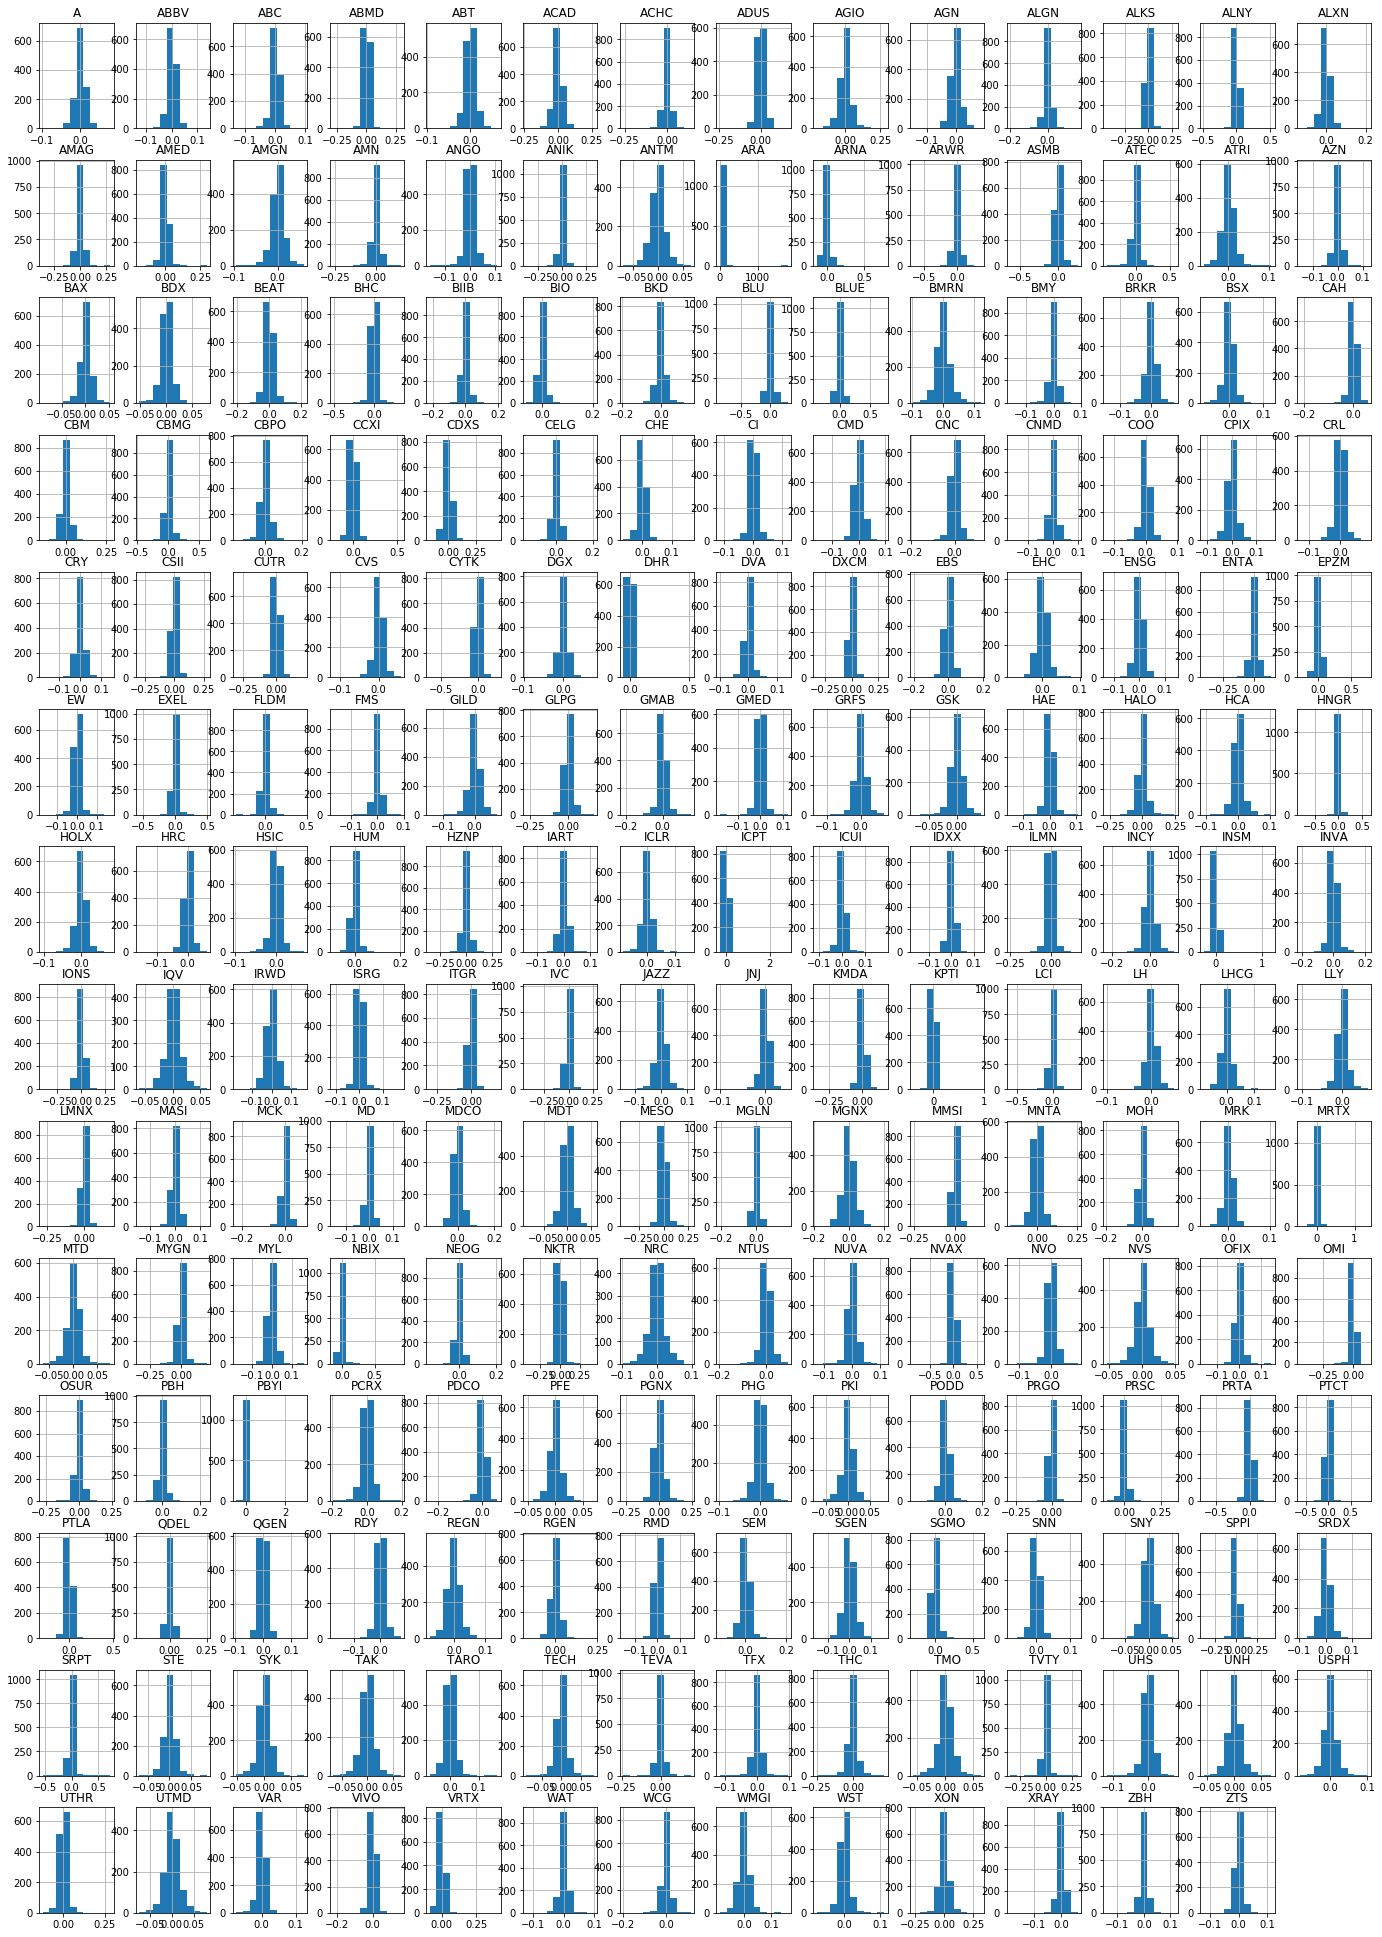

In [0]:
d_rets.hist()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(left=0.0, right=1.0, bottom=-1.25, top=1.25)
plt.show()

This is the beginning of screening process, which includes elementary statistical methods. Let' find Skew and Kurtosis Based on Daily Returns in search of Normally Distributed Values.

In [0]:
skews = d_rets.skew().sort_values()
#-0.5 < skew < 0.5
# if the skewness coefficient is positive, distribution has bump on left ->bad, a large proportion 
# of the returns will be below the mean
skews = pd.DataFrame(skews, columns=['Skew'])

In [0]:
skew_test = skews[(skews['Skew'] < .5) & (skews['Skew'] > -.5)]
#skew_test.head()
#len(skew_test.index)
skew_test.head()

,Skew
Symbols,
HOLX,-0.486685
NUVA,-0.484676
ALGN,-0.465711
A,-0.461023
BAX,-0.452404


In [0]:
len(skew_test)

80

In [0]:
d_rets.kurtosis().sort_values()

Symbols
NRC       1.637828
ANTM      1.793033
UTMD      1.805607
IQV       1.999768
UNH       2.153255
           ...    
INSM    260.897132
DHR     527.725883
ARA     549.135496
PBYI    691.040017
ICPT    719.626312
Length: 195, dtype: float64

Let's calculate Kurtosis

In [0]:
kurts = d_rets.kurtosis().sort_values()

# kurtosis <= 3, kurtosis < 3 denotes that returns are concentrated around the mean
# kurtosis > 3, fat tails ->bad
kurts = pd.DataFrame(kurts, columns=['Kurtosis'])

In [0]:
kurt_test = kurts[kurts['Kurtosis'] <= 3.5]
len(kurt_test.index)

18

**After** Screening for Normality on Skew and Kurtosis, Join and Save Tickers that meet both conditions 

In [0]:
optimal_set = list(set(skew_test.index) & set(kurt_test.index))
len(optimal_set)

17

In [0]:
opt = d_rets[optimal_set]
opt.columns

Index(['AMGN', 'ANTM', 'USPH', 'SGEN', 'BMRN', 'IQV', 'NRC', 'TMO', 'NVS',
       'MGNX', 'PFE', 'SYK', 'TAK', 'UTMD', 'MTD', 'UNH', 'IRWD'],
      dtype='object', name='Symbols')

After Passing the Kurtosis and Skew Test as Recommended by Portfolio Analysis Methods 15 Tickers Remain

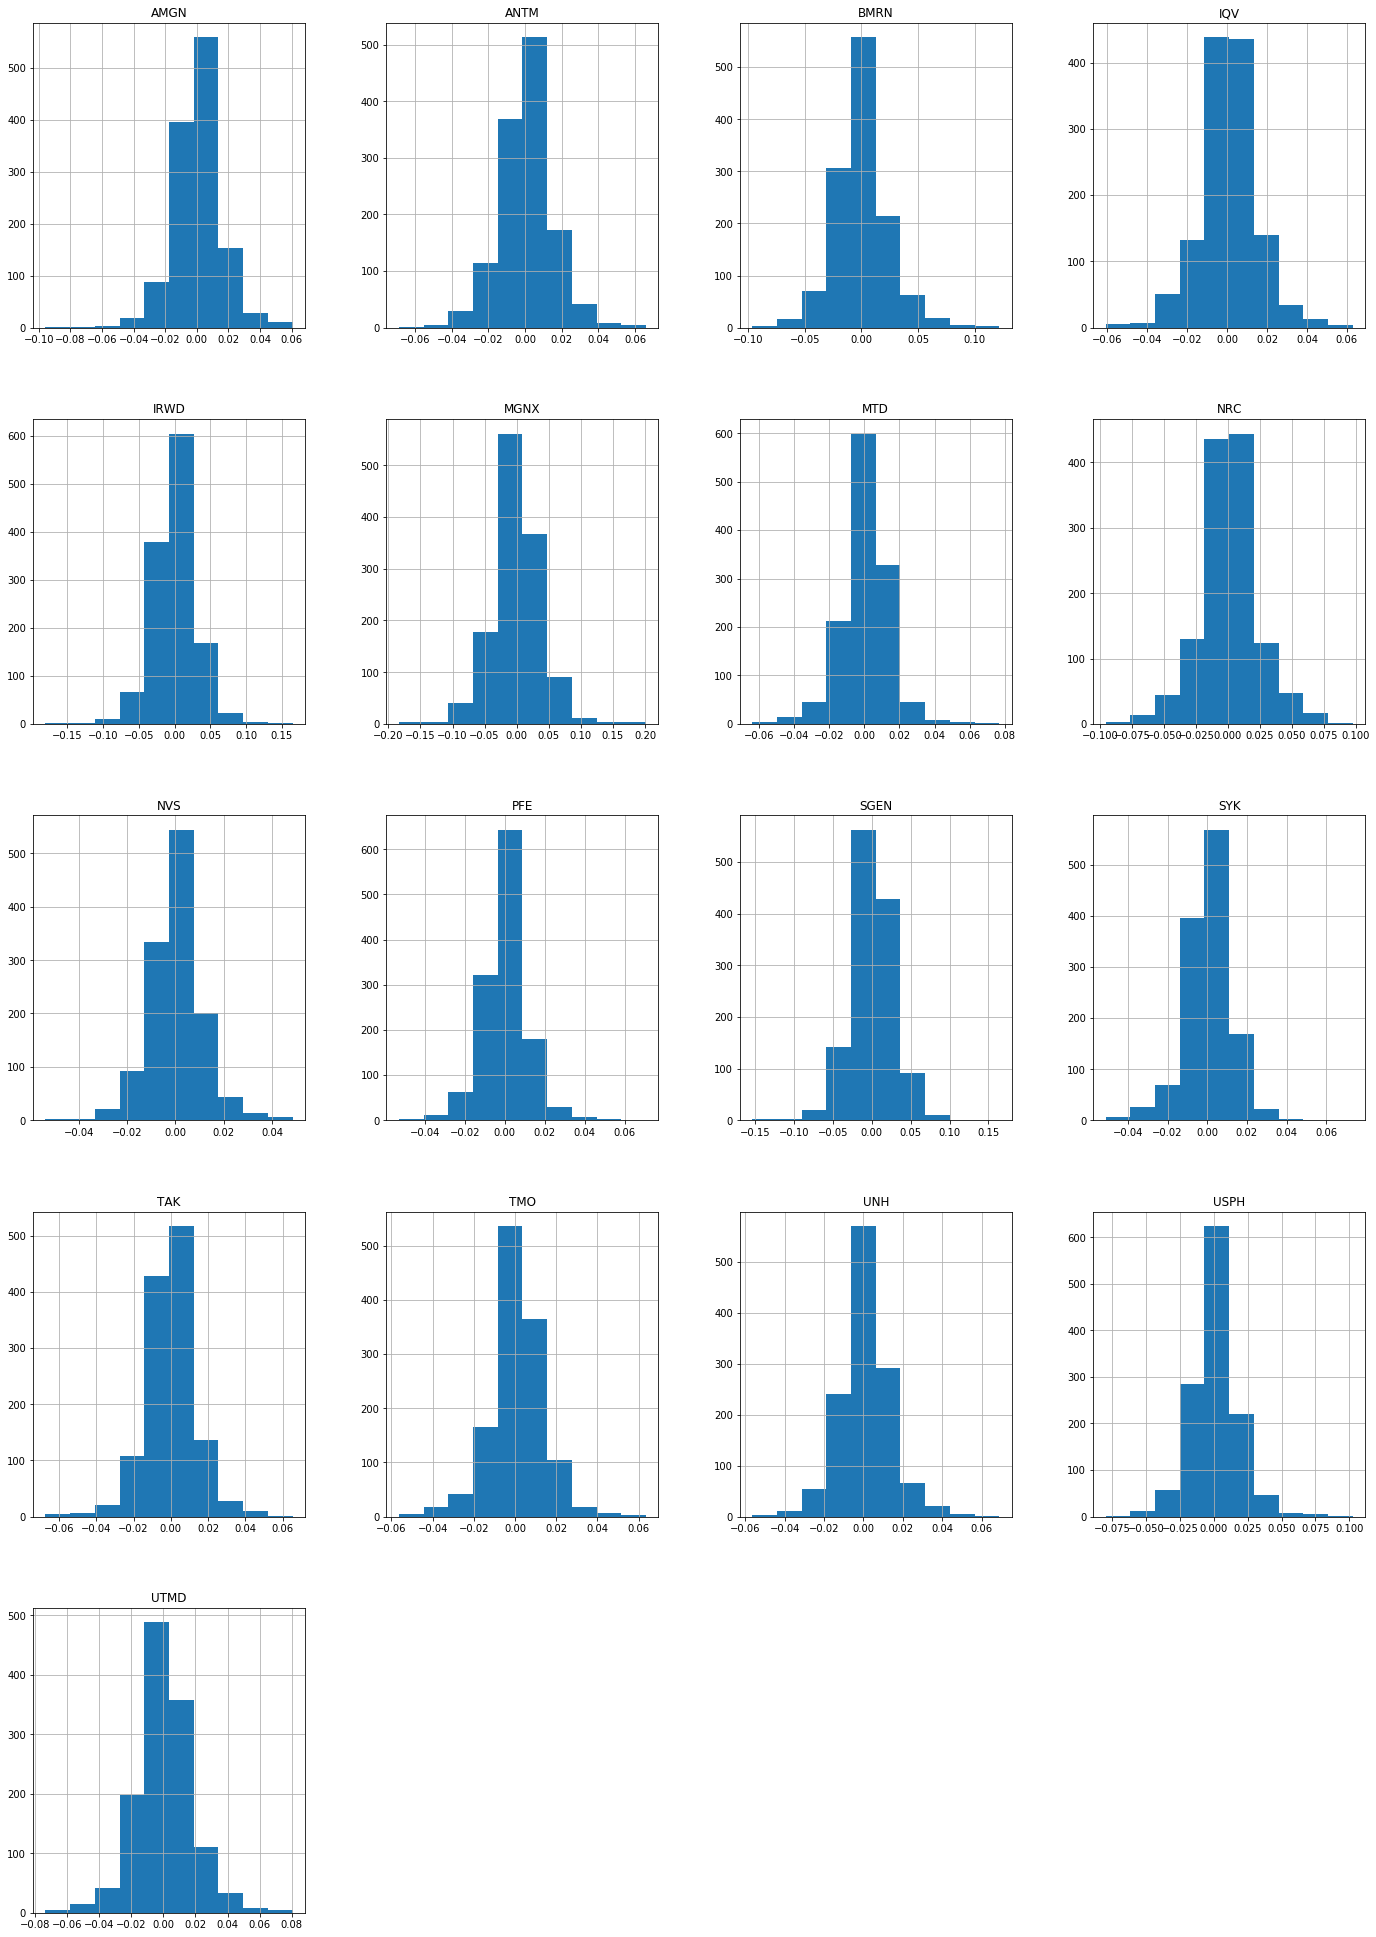

In [0]:
opt.hist()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(left=0.0, right=1.0, bottom=-1.25, top=1.25)
plt.show()

In [0]:
from scipy.stats import kurtosis,skew, skewtest,kurtosistest

In [0]:
skew(opt)[:10]
#skewtest

array([-0.12089042,  0.08045991,  0.32519152, -0.11411543,  0.37159011,
       -0.07430289, -0.05591776, -0.12522285,  0.07035416,  0.06649767])

In [0]:
kurtosis(opt)[:10]
#kurtosistest

array([3.02847705, 1.78116792, 3.15818909, 3.04033028, 2.26197795,
       1.9870835 , 1.6265779 , 2.38138073, 2.40556777, 2.90589093])

In [0]:
opt.head()

Symbols,AMGN,ANTM,USPH,SGEN,BMRN,IQV,NRC,TMO,NVS,MGNX,PFE,SYK,TAK,UTMD,MTD,UNH,IRWD
Date,,,,,,,,,,,,,,,,,
2014-01-03,-0.011485,0.000000,0.005012,-0.023395,-0.002599,0.010699,-0.016207,0.003831,0.004954,0.022546,0.001970,0.002814,-0.003492,0.043084,0.004886,0.007107,-0.009877
2014-01-06,-0.008648,-0.014895,-0.007627,-0.017074,-0.028803,-0.005617,0.032400,0.000091,0.001011,-0.005767,0.000983,0.006815,0.004380,-0.008891,-0.001195,-0.011451,-0.041563
2014-01-07,0.025996,0.020161,0.024830,0.037075,0.021461,0.016511,-0.011170,0.020443,0.003536,0.075742,0.006219,0.005707,-0.001745,0.033078,0.024503,0.030576,-0.008673
2014-01-08,-0.004724,0.012517,-0.002596,0.026000,0.018238,0.013464,-0.046261,0.015404,0.003020,0.023152,0.006832,0.016363,-0.002184,-0.017909,0.005275,-0.011632,0.069991
2014-01-09,0.025975,0.008458,0.022846,0.007554,0.005588,0.008857,-0.021997,-0.000351,0.013800,0.051457,-0.000646,-0.000390,0.002627,-0.012525,-0.000681,0.006083,0.013083


Setup for final step in selection process: Sortino Ratio w/ Risk Free Rate.
For simplicity, we will set the risk free rate to the current federal risk free rate. 
Sortino Ratio is a modification of Sharpe's Ratio w/ a special interest in hedging against negative returns. It is a measure of volatility based on negative returns or negative volatility. Sharpe Ratio is more commonly and it capture the standard devation of returns both positive and negative. Note that the only difference in the two formulas is the variant standard deviation. 

These ratios give you an idea of the risk to reward tradeoff where the goal is to achieve a higher reward. So we are always looking for larger positive ratios

In [0]:
#target = 0
rfr = 0.0174

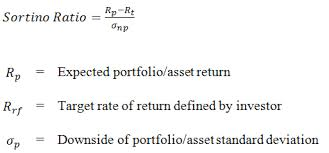

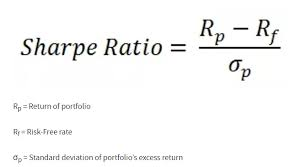

In [0]:
import numpy as np

In [0]:
opt.columns

Index(['AMGN', 'ANTM', 'USPH', 'SGEN', 'BMRN', 'IQV', 'NRC', 'TMO', 'NVS',
       'MGNX', 'PFE', 'SYK', 'TAK', 'UTMD', 'MTD', 'UNH', 'IRWD'],
      dtype='object', name='Symbols')

Screening for Negative Returns

In [0]:
neg_rets = opt[opt<0]
# based on daily returns
neg_rets.head()

Symbols,AMGN,ANTM,USPH,SGEN,BMRN,IQV,NRC,TMO,NVS,MGNX,PFE,SYK,TAK,UTMD,MTD,UNH,IRWD
Date,,,,,,,,,,,,,,,,,
2014-01-03,-0.011485,NaN,NaN,-0.023395,-0.002599,NaN,-0.016207,NaN,NaN,NaN,NaN,NaN,-0.003492,NaN,NaN,NaN,-0.009877
2014-01-06,-0.008648,-0.014895,-0.007627,-0.017074,-0.028803,-0.005617,NaN,NaN,NaN,-0.005767,NaN,NaN,NaN,-0.008891,-0.001195,-0.011451,-0.041563
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,-0.011170,NaN,NaN,NaN,NaN,NaN,-0.001745,NaN,NaN,NaN,-0.008673
2014-01-08,-0.004724,NaN,-0.002596,NaN,NaN,NaN,-0.046261,NaN,NaN,NaN,NaN,NaN,-0.002184,-0.017909,NaN,-0.011632,NaN
2014-01-09,NaN,NaN,NaN,NaN,NaN,NaN,-0.021997,-0.000351,NaN,NaN,-0.000646,-0.00039,NaN,-0.012525,-0.000681,NaN,NaN


Calc Expected Returns

In [0]:
exp_rets = opt.mean()
exp_rets[:10]

Symbols
AMGN    0.000627
ANTM    0.000972
USPH    0.001086
SGEN    0.000692
BMRN    0.000464
IQV     0.000833
NRC     0.000913
TMO     0.000658
NVS     0.000264
MGNX    0.000092
dtype: float64

Standard Deviation of Negative Returns

In [0]:
down_std = neg_rets.std()
down_std[:10]

Symbols
AMGN    0.010620
ANTM    0.009588
USPH    0.011460
SGEN    0.018937
BMRN    0.014935
IQV     0.009865
NRC     0.015421
TMO     0.009146
NVS     0.007311
MGNX    0.025272
dtype: float64

Calc Sortino Ratio to Finalize Selection Process and Save Best 5 Tickers

In [0]:
sortino_ratio = (exp_rets - rfr)/down_std
sortino_ratio.sort_values(ascending=False)

# toss tickers with nans and let 5 tickers with the smallest sortino ratio be the portfolio
best_ticks = sortino_ratio.sort_values(ascending=False)[:5]
best_ticks.index

Index(['MGNX', 'IRWD', 'SGEN', 'NRC', 'BMRN'], dtype='object', name='Symbols')

Max Drawdown on Best Tickers, Graphing Method for Visualizing Minimum Returns over the entire set of Values

In [0]:
data = dr.get_data_yahoo(opt.columns, start_date, end_date)

"best" dataframe contains best tickers

In [0]:
best = data.loc[:,('Adj Close',slice(None))]
best.columns = best.columns.droplevel(0)

In [0]:
best.head()

Symbols,AMGN,ANTM,USPH,SGEN,BMRN,IQV,NRC,TMO,NVS,MGNX,PFE,SYK,TAK,UTMD,MTD,UNH,IRWD
Date,,,,,,,,,,,,,,,,,
2014-01-02,99.509529,82.820824,31.642885,40.180000,69.269997,45.799999,16.320044,107.178558,57.588448,28.830000,24.574703,69.035042,18.586916,47.003345,241.529999,67.818520,10.175879
2014-01-03,98.366623,82.820824,31.801470,39.240002,69.089996,46.290001,16.055538,107.589180,57.873756,29.480000,24.623112,69.229294,18.522011,49.028419,242.710007,68.300522,10.075377
2014-01-06,97.515900,81.587181,31.558922,38.570000,67.099998,46.029999,16.575735,107.598938,57.932274,29.309999,24.647316,69.701065,18.603144,48.592525,242.419998,67.518394,9.656616
2014-01-07,100.050888,83.232071,32.342533,40.000000,68.540001,46.790001,16.390579,109.798630,58.137115,31.530001,24.800610,70.098831,18.570690,50.199856,248.360001,69.582870,9.572865
2014-01-08,99.578293,84.273849,32.258572,41.040001,69.790001,47.419998,15.632327,111.489967,58.312683,32.259998,24.970037,71.245850,18.530127,49.300842,249.669998,68.773468,10.242881


Max drawdown refers to largest percentage loss from a market peak to trough.  
For max drawdown, we need to find max and minimum values over a rolling window 253 trading days. Smaller time windows tend to result in smaller draw downs.  min_periods specifies the start of the measurements. min_periods = 1 means we start calculating from day one. 


In [0]:
#get max values over rolling time window
roll_max = best.rolling(min_periods=1, window=253).max()
#scale prices by max values. these values will be 0 or negative. they are the transformed prices in BLUE. 
daily_drawdown = best/roll_max - 1.0
#these are the min vals and are denoted in the graph as yellow minimun linearly interpolated boundaries. 
max_d_drawdown = daily_drawdown.rolling(min_periods=1,window=253).min()

In [0]:
roll_max[:10]

Symbols,AMGN,ANTM,USPH,SGEN,BMRN,IQV,NRC,TMO,NVS,MGNX,PFE,SYK,TAK,UTMD,MTD,UNH,IRWD
Date,,,,,,,,,,,,,,,,,
2014-01-02,99.509529,82.820824,31.642885,40.180000,69.269997,45.799999,16.320044,107.178558,57.588448,28.830000,24.574703,69.035042,18.586916,47.003345,241.529999,67.818520,10.175879
2014-01-03,99.509529,82.820824,31.801470,40.180000,69.269997,46.290001,16.320044,107.589180,57.873756,29.480000,24.623112,69.229294,18.586916,49.028419,242.710007,68.300522,10.175879
2014-01-06,99.509529,82.820824,31.801470,40.180000,69.269997,46.290001,16.575735,107.598938,57.932274,29.480000,24.647316,69.701065,18.603144,49.028419,242.710007,68.300522,10.175879
2014-01-07,100.050888,83.232071,32.342533,40.180000,69.269997,46.790001,16.575735,109.798630,58.137115,31.530001,24.800610,70.098831,18.603144,50.199856,248.360001,69.582870,10.175879
2014-01-08,100.050888,84.273849,32.342533,41.040001,69.790001,47.419998,16.575735,111.489967,58.312683,32.259998,24.970037,71.245850,18.603144,50.199856,249.669998,69.582870,10.242881
2014-01-09,102.164810,84.986626,32.995544,41.349998,70.180000,47.840000,16.575735,111.489967,59.117409,33.919998,24.970037,71.245850,18.603144,50.199856,249.669998,69.582870,10.376884
2014-01-10,102.164810,84.986626,32.995544,42.970001,70.180000,48.610001,16.575735,111.900574,59.505131,37.029999,24.970037,72.291168,18.668049,50.199856,249.990005,69.582870,10.837521
2014-01-13,102.164810,84.986626,32.995544,42.970001,70.180000,49.160000,16.575735,111.900574,59.505131,37.029999,24.970037,72.291168,18.668049,50.199856,249.990005,69.582870,10.837521
2014-01-14,102.164810,84.986626,33.032852,43.790001,71.339996,49.160000,16.575735,112.193855,59.505131,37.189999,25.010366,72.300392,18.838419,50.853699,252.449997,69.582870,10.837521


In [0]:
daily_drawdown.head()

Symbols,AMGN,ANTM,USPH,SGEN,BMRN,IQV,NRC,TMO,NVS,MGNX,PFE,SYK,TAK,UTMD,MTD,UNH,IRWD
Date,,,,,,,,,,,,,,,,,
2014-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-03,-0.011485,0.000000,0.000000,-0.023395,-0.002599,0.000000,-0.016207,0.0,0.0,0.000000,0.0,0.0,-0.003492,0.000000,0.000000,0.000000,-0.009877
2014-01-06,-0.020035,-0.014895,-0.007627,-0.040070,-0.031327,-0.005617,0.000000,0.0,0.0,-0.005767,0.0,0.0,0.000000,-0.008891,-0.001195,-0.011451,-0.051029
2014-01-07,0.000000,0.000000,0.000000,-0.004480,-0.010538,0.000000,-0.011170,0.0,0.0,0.000000,0.0,0.0,-0.001745,0.000000,0.000000,0.000000,-0.059259
2014-01-08,-0.004724,0.000000,-0.002596,0.000000,0.000000,0.000000,-0.056915,0.0,0.0,0.000000,0.0,0.0,-0.003925,-0.017909,0.000000,-0.011632,0.000000


In [0]:
for f in best_ticks.index:
  daily_drawdown[f].plot()
  max_d_drawdown[f].plot()
  plt.show()

#Summary: Through basic statistical methods and with the use of the Sortino Ratio we have reduced volatility in our set of stock returns. We have graphed the returns behavior of the final 5 tickers with the max drawdown method.  